## 1. Mengimport packages yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import statistics as st
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve



## 2. Mengimport excel ke dalam Notebook serta memberi kategori pada rumah yang mahal dan murah

In [6]:
#Mengimport data
df = pd.read_excel('/Users/ryansfolder/Downloads/nuzulul.xlsx')

In [8]:
#Labeling dengan Median
median= np.median(df["SalePrice"])
mean = np.mean(df["SalePrice"])
mode = st.mode(df["SalePrice"])
print(f"Median adalah: {median}")
temporary = []
x = 0
for i in df["SalePrice"]:
    if i < median:
        temporary.append(0)
    else:
        temporary.append(1)

df["Category"] = temporary

df
        

Median adalah: 163000.0
180921.19589041095
140000


,OverallQual,TotalBsmtSF,GrLivArea,GarageCars,SalePrice,Category
0,7,856,1710,2,208500,1
1,6,1262,1262,2,181500,1
2,7,920,1786,2,223500,1
3,7,756,1717,3,140000,0
4,8,1145,2198,3,250000,1
...,...,...,...,...,...,...
1455,6,953,1647,2,175000,1
1456,6,1542,2073,2,210000,1
1457,7,1152,2340,1,266500,1
1458,5,1078,1078,1,142125,0


## 3. Melakukan prosedur Random Forest dan menentukan akurasi

In [ ]:
#Memilah variabel X dan Y
to_drop = ["Category", "SalePrice"]
X = df.drop(columns=to_drop, axis=1)
y = df["Category"]

#Membuat training dan testing

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#fit the data
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

#Menghitung confusion matrix

conmat = confusion_matrix(y_test, y_pred)

value = np.mat(conmat)
classname = list(set(y_train))
df_cm = pd.DataFrame( value, index=classname, columns=classname)

print(df_cm)



     0    1
0  210   23
1   15  190


In [ ]:
# Menghitung metrik akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (Specificity): {1-fpr}")


Accuracy: 0.91324200913242
Precision: 0.892018779342723
Recall (Sensitivity): 0.926829268292683
F1-Score: 0.9090909090909092
False Positive Rate (FPR): [0.         0.09871245 1.        ]
False Negative Rate (Specificity): [1.         0.90128755 0.        ]


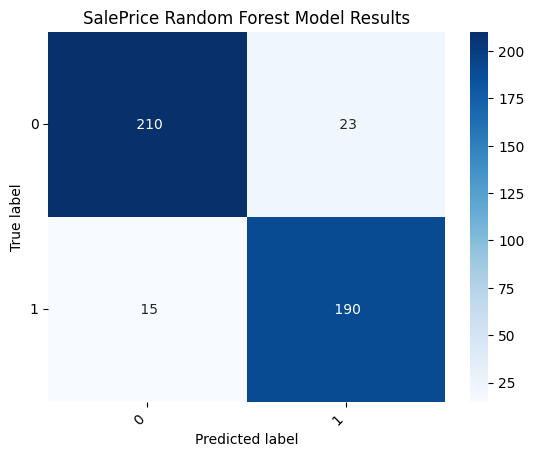

In [ ]:
#Plotting confusion matrix
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = ' .0f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SalePrice Random Forest Model Results')

plt.show()    



In [ ]:
#Cross-validation test
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation score :", np.mean(scores))

#KFold Validation Test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

results = cross_val_score(rf, X, y, cv=kfold)


print(f'Hasil K-fold Cross-Validation: {results}')
print(f'Rata-rata Akurasi: {results.mean()}')



Cross-Validation Scores: [0.89383562 0.93493151 0.88013699 0.85273973 0.88356164]
Average Cross-Validation score : 0.8890410958904109
Hasil K-fold Cross-Validation: [0.92123288 0.89041096 0.87328767 0.8869863  0.89383562]
Rata-rata Akurasi: 0.8931506849315068


## 4. Melakukan prosedur Gradient Boosting dan menentukan akurasin

In [ ]:
#Memilah variabel X dan Y
to_drop = ["Category", "SalePrice"]
X = df.drop(columns=to_drop, axis=1)
y = df["Category"]

#Membuat training dan testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Membuat confusion matrix

conmat = confusion_matrix(y_test, y_pred)

value = np.mat(conmat)
classname = list(set(y_train))
df_cm = pd.DataFrame( value, index=classname, columns=classname)

print(df_cm)


     0    1
0  209   24
1   13  192


In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (Specificity): {1-fpr}")


Accuracy: 0.9155251141552512
Precision: 0.8888888888888888
Recall (Sensitivity): 0.9365853658536586
F1-Score: 0.9121140142517815
False Positive Rate (FPR): [0.         0.10300429 1.        ]
False Negative Rate (Specificity): [1.         0.89699571 0.        ]


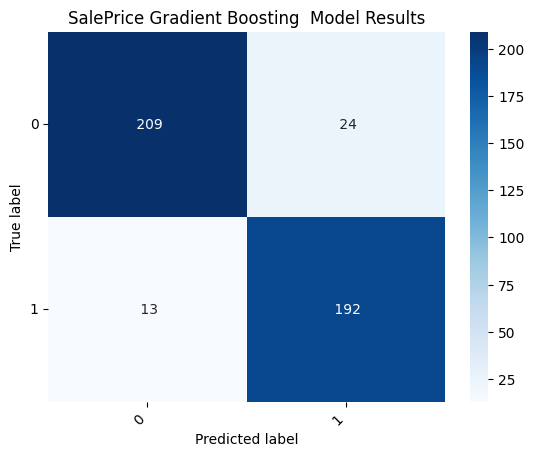

In [ ]:
#Plotting confusion matrix
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = ' .0f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('SalePrice Gradient Boosting  Model Results')

plt.show()    

In [ ]:
#cross validation test
scores = cross_val_score(gb, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation score :", np.mean(scores))

#KFold validation test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

results = cross_val_score(gb, X, y, cv=kfold)


print(f'Hasil K-fold Cross-Validation: {results}')
print(f'Rata-rata Akurasi KFold: {results.mean()}')



Cross-Validation Scores: [0.91780822 0.92465753 0.88013699 0.87671233 0.88013699]
Average Cross-Validation score : 0.8958904109589041
Hasil K-fold Cross-Validation: [0.90753425 0.90068493 0.86643836 0.87328767 0.89726027]
Rata-rata Akurasi KFold: 0.8890410958904111


## 5. Melakukan prosedur Decision Tree dan menghitung akurasi

In [ ]:
#Menentukan variabel X dan Y
to_drop = ["Category", "SalePrice"]
X = df.drop(columns=to_drop, axis=1)
y = df["Category"]

#membagi data training dan test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

#Menggambar confusion matrix
conmat = confusion_matrix(y_test, y_pred)

value = np.mat(conmat)
classname = list(set(y_train))
df_cm = pd.DataFrame( value, index=classname, columns=classname)

print(df_cm)


     0    1
0  200   33
1   26  179


In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass
f1 = f1_score(y_test, y_pred, average='binary')  # or 'macro' for multiclass

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"F1-Score: {f1}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (Specificity): {1-fpr}")


Accuracy: 0.865296803652968
Precision: 0.8443396226415094
Recall (Sensitivity): 0.8731707317073171
F1-Score: 0.8585131894484412
False Positive Rate (FPR): [0.        0.1416309 1.       ]
False Negative Rate (Specificity): [1.        0.8583691 0.       ]


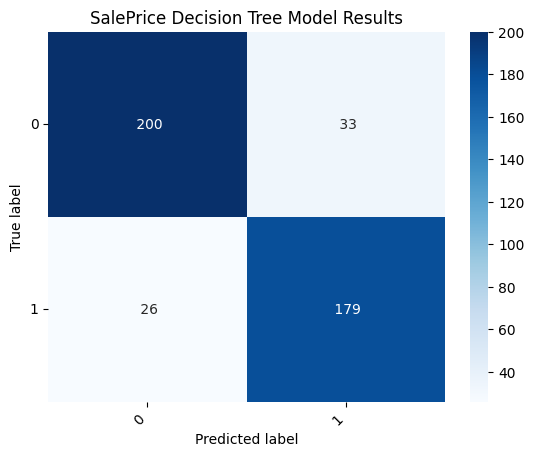

In [ ]:
#Plotting confusion matrix
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = ' .0f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label') 
plt.title('SalePrice Decision Tree Model Results')

plt.show()    


In [ ]:
#cross validation test
scores = cross_val_score(dt, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation score :", np.mean(scores))

#kfold cross validation test
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

results = cross_val_score(dt, X, y, cv=kfold)


print(f'Hasil K-fold Cross-Validation: {results}')
print(f'Rata-rata Akurasi KFold: {results.mean()}')



Cross-Validation Scores: [0.85958904 0.8869863  0.81506849 0.82876712 0.84589041]
Average Cross-Validation score : 0.8472602739726028
Hasil K-fold Cross-Validation: [0.8869863  0.89726027 0.84589041 0.85958904 0.85616438]
Rata-rata Akurasi KFold: 0.8691780821917808
